<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 2</center></h2>
<h3><center>Task # 1</center></h3>

In [2]:
# Include libraries which may use in implementation
import numpy as np
import random
import matplotlib.pyplot as plt
from math import log
import pickle
%matplotlib inline


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Create a Neural_Network class
class Neural_Network(object):    
    def __init__(self,inputSize = 2,outputSize = 1 ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize    
        #weights
        # randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, outputSize) that +1 is for bias    
        self.W1 = np.random.rand(2,1) 
        self.Bias=np.random.rand(1)
        

    def feedforward(self, X):
        # dot product of X (input) and set of weights
        prod=np.dot(X,self.W1)+self.Bias
        # apply activation function (i.e. sigmoid)
        return self.sigmoid(prod)

    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))

    def sigmoid_derivative(self, s):
        return s*(1-s)

    def backwardpropagate(self,X, Y, y_pred, lr):
        # backward propagate through the network
        # compute error in output which is loss compute cross entropy loss function
        # applying derivative of sigmoid to the error
        # adjust set of weights
        # 2(y-yhat)*s(1-s)*x
        
        #W = np.dot(X.T, (lr*(Y - y_pred) * self.sigmoid_derivative(y_pred)))
        #self.W1 += W
        
        # backpropagation step 1
        
        error = y_pred - Y
        dcost_dpred = error
        dpred_dz = self.sigmoid_derivative(y_pred)
        z_delta = dcost_dpred * dpred_dz
        inputs = X.T
        self.W1 -= lr * np.dot(inputs, z_delta)
        for num in z_delta:
            self.Bias -= lr * num
    
    def crossentropy(self, Y, Y_pred):
        # compute error based on crossentropy loss 
        sum_score = 0.0
        for i in range(len(Y)):
            sum_score += Y[i] * log(1e-15 + Y_pred[i])
            mean_sum_score = 1.0 / len(Y) * sum_score
        return -mean_sum_score

    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ,validationX = None, validationY = None):
        
        # feed forward trainX and trainY and recivce predicted value
        # backpropagation with trainX, trainY, predicted value and learning rate.
        # if validationX and validationY are not null than show validation accuracy and error of the model.
        # plot error of the model if plot_err is true
        error=[]
        for i in range(epochs):
            YP=self.feedforward(trainX)
            self.backwardpropagate(trainX,trainY,YP,learningRate)
            error.append(self.crossentropy(trainY,YP))
        if plot_err==True:
            plt.plot(error)
    

    def predict(self, testX):
        return self.feedforward(testX)
    
    def accuracy(self, testX, testY):
        # predict the value of trainX
        total=len(testX)
        count=0
        a=0
        # compare it with testY
        for i in range(total):
            yp=self.predict(testX[i])
            if yp < 0.5: a=0
            if yp >= 0.5: a=1
            #print(yp,a)
            if a==int(testY[i]):
                count=count+1
        
        # compute accuracy, print it and show in the form of picture
        return (count/total)*100 # return accuracy    
    
    def saveModel(self,name):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        file = open(name, 'wb')
        
        input_size=self.inputSize
        output_size=self.outputSize
        weights=self.W1
        bias=self.Bias
        
        
        model_data={
            "input_size":input_size,
            "output_size":output_size,
            "weights":weights,
            "bias":bias}
        
        #model_data=[input_size,output_size,weights,bias]
        #pickle.dumps(model, file)
        file.write(pickle.dumps(model_data))
        print(model_data)
        file.close()
        print("Model saved successfully")

    
    def loadModel(self,name):
        # load your trained model, load exactly how you stored it.
        datax = pickle.loads(open(name, "rb").read())
        
        self.inputSize=datax['input_size']
        self.outputSize=datax['output_size']
        self.W1=datax['weights']
        self.Bias=datax['bias']
        print(datax)
        


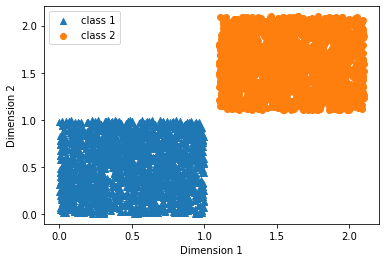

In [5]:
# generating dataset point
np.random.seed(1)
no_of_samples = 2000
dims = 2
#Generating random points of values between 0 to 1
class1=np.random.rand(no_of_samples,dims)
#To add separability we will add a bias of 1.1
class2=np.random.rand(no_of_samples,dims)+1.1
class_1_label=np.array([1 for n in range(no_of_samples)])
class_2_label=np.array([0 for n in range(no_of_samples)])
#Lets visualize the dataset
plt.scatter(class1[:,0],class1[:,1], marker='^', label="class 1")
plt.scatter(class2[:,0],class2[:,1], marker='o', label="class 2")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()

In [6]:
# Data concatenation
data = np.concatenate((class1,class2),axis=0)
label = np.concatenate((class_1_label,class_2_label),axis=0)
# Reshape label
label=label.reshape(4000,1)
# Concatenating data for shuffling 
td=np.concatenate((data,label),axis=1)
np.random.shuffle(td)


#Split Data into two columns again
data,label=np.hsplit(td,np.array([2,]))

# Distribute this data into three parts i.e. training, validation and testing
#trainX, testX, trainY, testY = train_test_split(data,label, test_size=0.4)

trainX,testX,validX=np.split(data, [int(.6 * len(data)), int(.8 * len(data))])
trainY,testY,validY=np.split(label, [int(.6 * len(label)), int(.8 * len(label))])

In [7]:
print(trainX.shape)
print(testX.shape)
print(validX.shape)
print(trainY.shape)
print(testY.shape)
print(validY.shape)

(2400, 2)
(800, 2)
(800, 2)
(2400, 1)
(800, 1)
(800, 1)


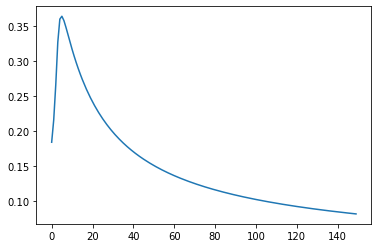

In [8]:
model = Neural_Network(2,1)
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 150, learningRate = 0.001,plot_err=True, validationX = validX, validationY = validY)

In [9]:
print(model.accuracy(testX,testY))

100.0


In [10]:
#save the best model which you have trained, 
model.saveModel('bestmodel.pkl')

{'input_size': 2, 'output_size': 1, 'weights': array([[-1.83551355],
       [-2.09819312]]), 'bias': array([3.99180256])}
Model saved successfully


#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [11]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.loadModel('bestmodel.pkl')
# check accuracy of that model
mm.accuracy(testX,testY)


{'input_size': 2, 'output_size': 1, 'weights': array([[-1.83551355],
       [-2.09819312]]), 'bias': array([3.99180256])}


100.0

In [12]:
mm.accuracy(validX,validY)

100.0